<a href="https://colab.research.google.com/github/davdevv/Sharpness_Aware_Minimization_project/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/davdevv/Sharpness_Aware_Minimization_project.git

Cloning into 'Sharpness_Aware_Minimization_project'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


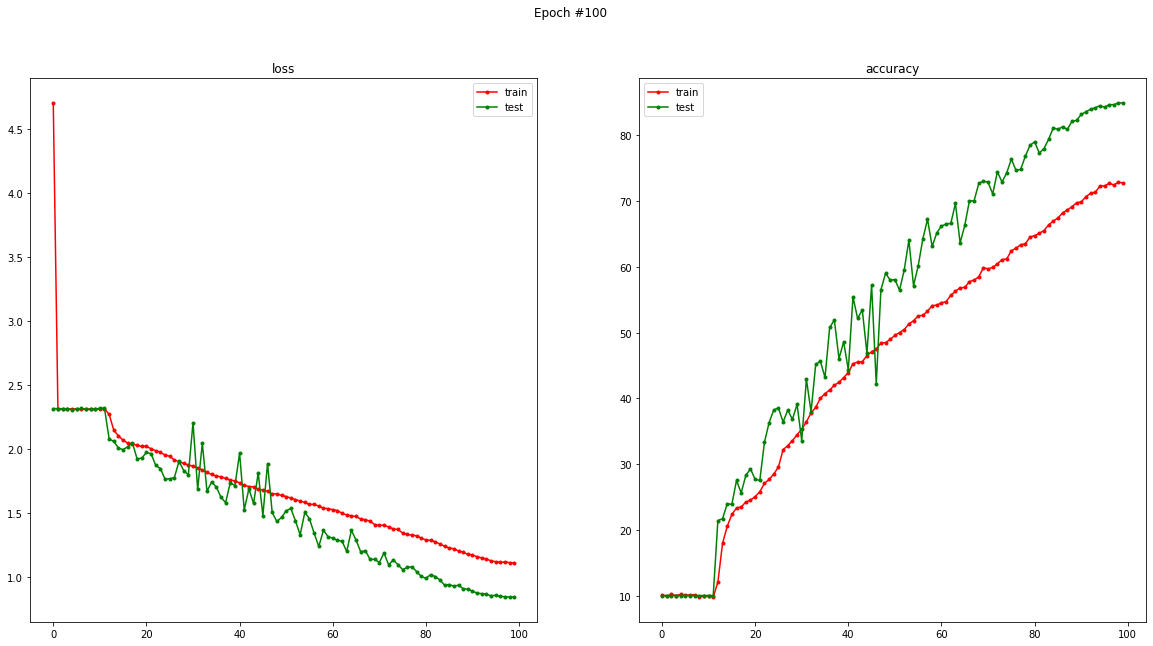

In [2]:
import torch
from Sharpness_Aware_Minimization_project.code.data.cifar import Cifar10
from Sharpness_Aware_Minimization_project.code.model.resnet import Resnet
from Sharpness_Aware_Minimization_project.code.sam import SAM
from Sharpness_Aware_Minimization_project.code.train import train


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 100
batch_size = 128
threads = 2
lr=1.0
momentum=0.9
nesterov=True
weight_decay=1e-4
rho=0.05
label_smoothing = 0.1

use_autoaugment, use_cutout = True, True

dataset = Cifar10(batch_size, use_autoaugment, use_cutout, threads=threads)
num_classes = dataset.num_classes
model = Resnet('resnet50', num_classes).to(device)

base_optimizer = torch.optim.SGD
optimizer = SAM(model.parameters(), base_optimizer, rho=rho, lr=lr, momentum=momentum, weight_decay=weight_decay, nesterov=nesterov)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer.base_optimizer, T_max=num_epochs)

train(optimizer, scheduler, model, dataset, num_epochs, label_smoothing=label_smoothing, device=device)